## Setup

In this notebook, we solve the Week 2 Mid Evaluation Assignment.
All image visualizations are done using **Matplotlib** as instructed.


In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Q1. Image I/O and Color Spaces

We load an image using OpenCV, convert it into different color spaces,
and display them using Matplotlib.


In [2]:
# Load image (replace path if needed)
img = cv2.imread("image.jpeg")

# Convert for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


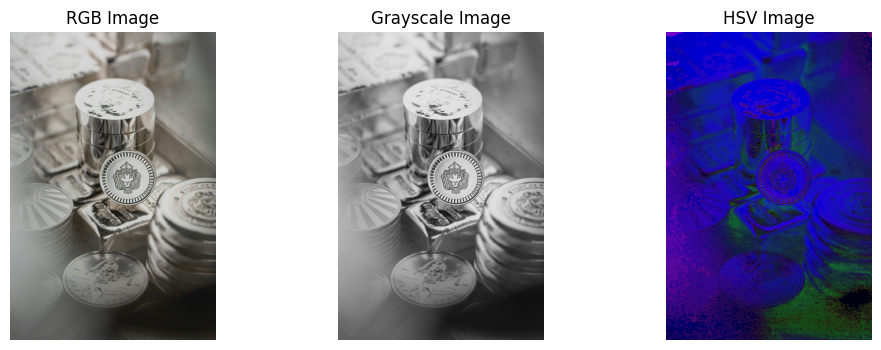

In [3]:
# Display images
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_hsv)
plt.title("HSV Image")
plt.axis("off")

plt.show()


**Answer:**  
OpenCV reads images in BGR format due to historical design choices.
Matplotlib expects RGB images, so color conversion is required
to display images correctly.


## Q2. Histogram Analysis

We analyze the grayscale histogram of an image and apply
histogram equalization to improve contrast.


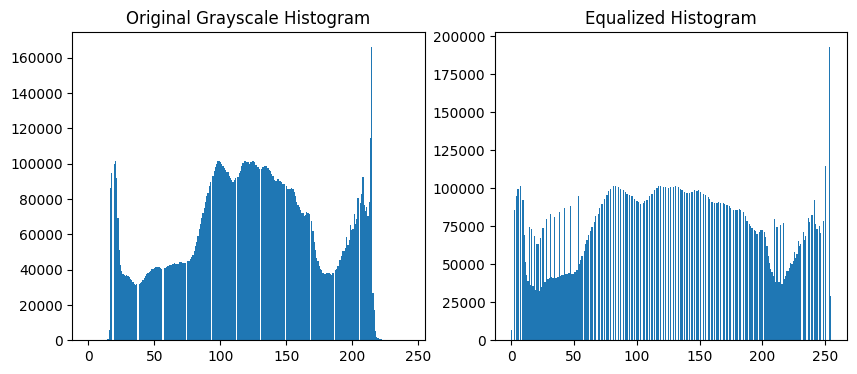

In [4]:
# Grayscale Histogram
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(img_gray.ravel(), bins=256)
plt.title("Original Grayscale Histogram")

# Histogram Equalization
img_eq = cv2.equalizeHist(img_gray)

plt.subplot(1,2,2)
plt.hist(img_eq.ravel(), bins=256)
plt.title("Equalized Histogram")

plt.show()


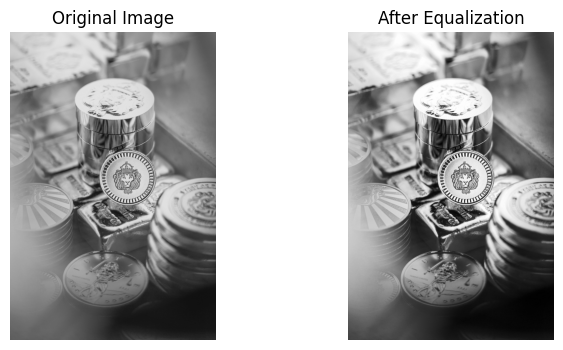

In [5]:
# Display before and after
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq, cmap="gray")
plt.title("After Equalization")
plt.axis("off")

plt.show()


**Observation:**  
Histogram equalization improves contrast, especially in low-contrast regions.

**Limitation:**  
It is not useful for images that already have good contrast or contain a lot of noise.


## Q3. Image Smoothing and Noise Reduction

Artificial noise is added to the image, followed by
different smoothing filters to reduce noise.


In [6]:
# Add noise
noise = np.random.normal(0, 25, img_gray.shape)
noisy_img = img_gray + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)


In [7]:
# Apply filters
avg_blur = cv2.blur(noisy_img, (5,5))
gaussian_blur = cv2.GaussianBlur(noisy_img, (5,5), 0)
median_blur = cv2.medianBlur(noisy_img, 5)


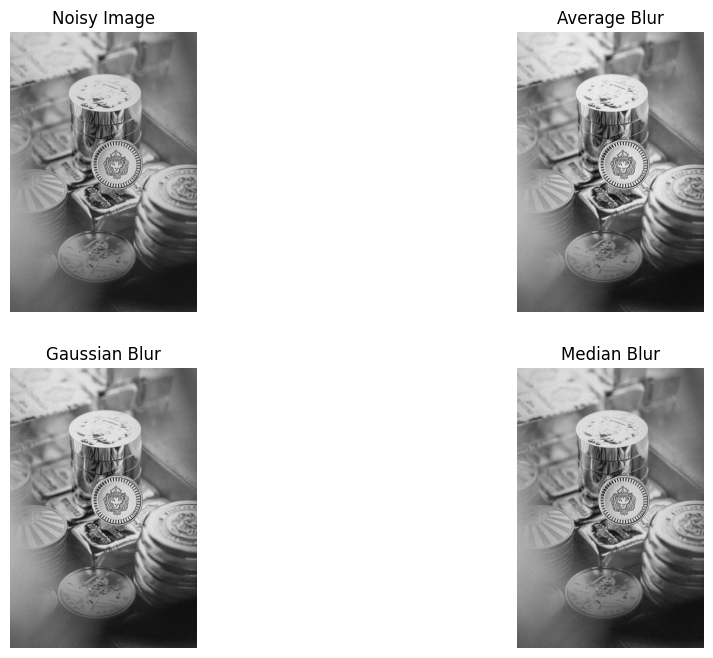

In [8]:
# Display results
plt.figure(figsize=(12,8))

titles = ["Noisy Image", "Average Blur", "Gaussian Blur", "Median Blur"]
images = [noisy_img, avg_blur, gaussian_blur, median_blur]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


**Noise Handling:**  
Median blur removes noise most effectively.

**Edge Preservation:**  
Gaussian blur preserves edges better than average blur.


## Q4. Geometric Transformations

We perform resizing, rotation, and translation on the image.


In [9]:
# Transformations
h, w = img_rgb.shape[:2]

# Resize
resized = cv2.resize(img_rgb, (w//2, h//2))

# Rotate
center = (w//2, h//2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img_rgb, M_rot, (w, h))

# Translate
M_trans = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img_rgb, M_trans, (w, h))


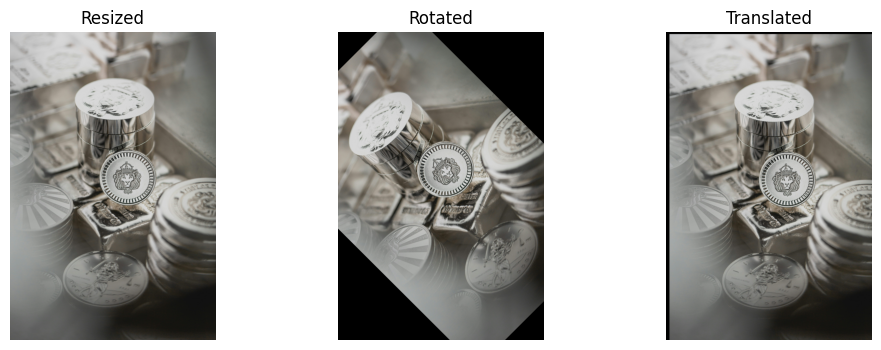

In [10]:
# Display transformations
plt.figure(figsize=(12,4))

images = [resized, rotated, translated]
titles = ["Resized", "Rotated", "Translated"]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()


Black regions appear because parts of the transformed image
map outside the original image boundaries, leaving empty pixels.


## Q5. Manual vs Automatic Thresholding

We compare global, adaptive, and Otsu thresholding methods.


In [11]:
# Thresholding
_, th_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

th_adaptive = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

_, th_otsu = cv2.threshold(
    img_gray, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)


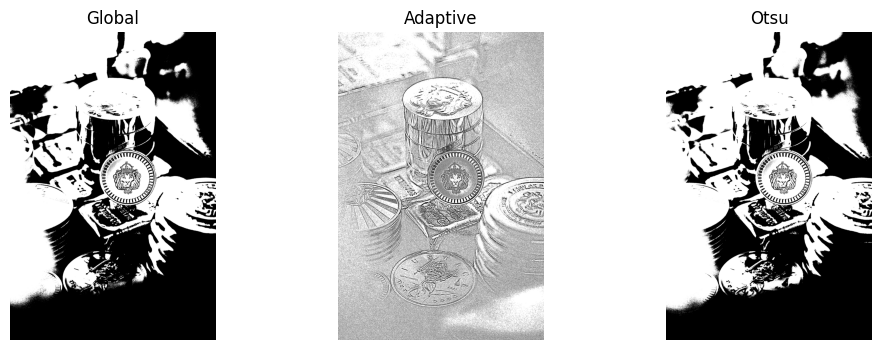

In [12]:
# Display thresholds
plt.figure(figsize=(12,4))

titles = ["Global", "Adaptive", "Otsu"]
images = [th_global, th_adaptive, th_otsu]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


Adaptive thresholding works best under uneven lighting.
Global thresholding fails when illumination varies across the image.


## Q6. Thresholding as Segmentation

We use a binary threshold to isolate the foreground object.


In [13]:
# Segmentation
mask = th_otsu
segmented = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)


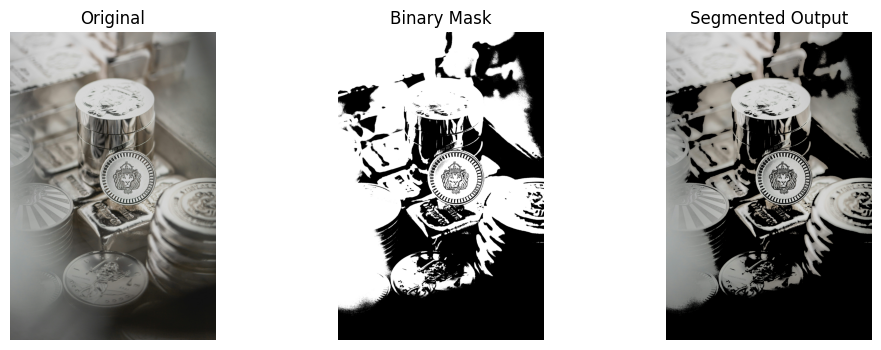

In [14]:
# Display segmentation
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Binary Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(segmented)
plt.title("Segmented Output")
plt.axis("off")

plt.show()


Thresholding converts an image into a binary mask separating
foreground from background. This mask can be applied to the
original image to perform segmentation.


## Q7. Conceptual Reflection

- Smoothing reduces noise before thresholding.
- HSV separates color from illumination, aiding segmentation.
- Histogram equalization can amplify noise.
- OpenCV functions are optimized and reliable.


## Bonus: Mini OpenCV Pipeline


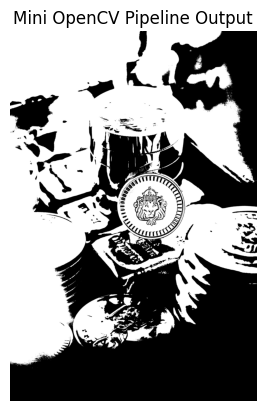

In [15]:
# Pipeline
blur = cv2.GaussianBlur(img_gray, (5,5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh, cmap="gray")
plt.title("Mini OpenCV Pipeline Output")
plt.axis("off")
plt.show()
